#### Phase 5 Project

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from nltk import WordNetLemmatizer 
from nltk.corpus import wordnet 
from nltk import pos_tag 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score

#### Summary of Analysis
- Baseline Model is Random Forest Classifier. This includes Precision, Recall, F1 Score, and Accuracy. This is all summarized in a classification report. A Roc curve was also generated for the Random Forest Classifier. 
- 3 other additional models were added. These models are a logistic regression, Decision Tree Classifier, and Multinomial.
- Hyperparameters were created with more iterations for the baseline model and then higher tolerance. 
- A SMOTE function was created for the Random Forest Classifier.
- A Linear Regression was created for the monthly income variable. Statistical Signficance was found for multiple dependent variables.
- A multi-class variable was also created for marital status 

## Load Data - Balanced Study

In [67]:
df = pd.read_csv('HR_Analytics.csv')
df['Gender'].value_counts()

Male      889
Female    591
Name: Gender, dtype: int64

In [23]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

#### Drop Columns with NAs

In [42]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

#### Scatter Plots for Target Variable

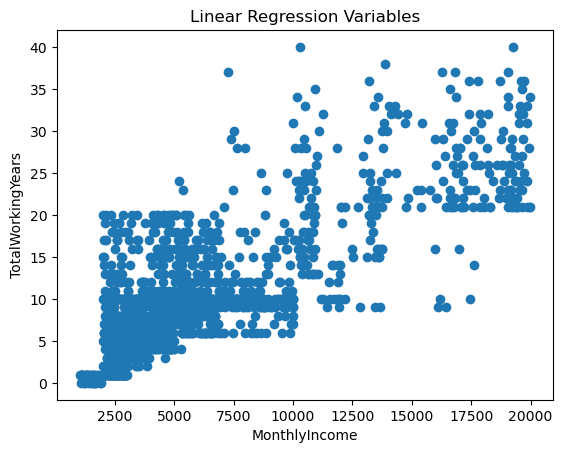

In [54]:
import matplotlib.pyplot as plt
X = df["MonthlyIncome"]
y = df["TotalWorkingYears"]
plt.scatter(X, y)
plt.xlabel('MonthlyIncome')
plt.ylabel('TotalWorkingYears')
plt.title('Linear Regression Variables')
plt.show()

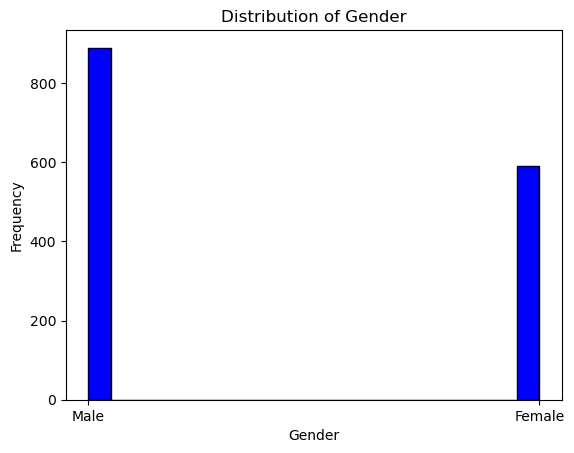

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

df = df['Gender']

plt.hist(df, bins=20, color='blue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

#### One Hot Encode Target Variable

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Gender'])
encoded_data
df['Gender'] = pd.DataFrame(encoded_data, columns = ['Gender'], index=df['Gender'].index)
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

#### Balance Dataset

In [27]:
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

In [28]:
ones = df[df.iloc[:,12] == 1]
zeros = df[df.iloc[:,12] == 0]
zeros

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
5,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,...,3,3,80,0,0,5,4,0,0,0
6,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,...,3,3,80,0,0,2,4,0,0,0
7,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,1,...,3,3,80,0,0,4,1,0,0,0
9,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,3,4,80,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


In [29]:
ones.iloc[:591,12].value_counts()

1    591
Name: Gender, dtype: int64

In [30]:
onesdf = ones.iloc[:591, :]
onesdf.shape

(591, 36)

In [31]:
zeros.shape

(591, 36)

In [32]:
df = pd.concat([onesdf,zeros], axis=0)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
8,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,...,3,4,80,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


#### Train Test Set

In [33]:
y = df['Gender']
X = df.drop(columns=['Gender'], axis=1)
X.head()
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: Gender, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
y_train

560     1
501     1
365     0
1048    0
902     1
       ..
1129    0
449     0
620     0
920     1
261     0
Name: Gender, Length: 886, dtype: int64

#### One Hot Encode Data

In [35]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'AgeGroup_26-35', 'AgeGroup_36-45',
       'AgeGroup_46-55', 'AgeGroup_55+', 'Attrition_Yes',
       'BusinessTravel_TravelRarely', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_

#### Transform Test Object Variables

In [36]:
test_dummies = ohe.transform(X_test[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
586,34,1354,5,3,1,153,3,45,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
573,33,867,8,4,1,1798,4,90,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
302,29,337,14,1,1,1421,3,84,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
708,35,660,7,1,1,1492,4,76,3,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
835,37,1252,19,2,1,904,1,32,3,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,40,692,11,3,1,1985,4,73,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
592,34,1362,19,3,1,502,1,67,4,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
387,30,945,9,3,1,1876,2,89,3,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
170,27,472,1,1,1,274,3,60,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### First Simple Model - Random Forest Classifier

In [37]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

#### Metrics

In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.7570422535211268
Testing Precision:  0.4869109947643979



Training Recall:  0.947136563876652
Testing Recall:  0.6788321167883211



Training Accuracy:  0.8171557562076749
Testing Accuracy:  0.5202702702702703



Training F1-Score:  0.8414872798434443
Testing F1-Score:  0.5670731707317073


#### Classification Report

In [40]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       432
           1       0.76      0.95      0.84       454

    accuracy                           0.82       886
   macro avg       0.84      0.81      0.81       886
weighted avg       0.84      0.82      0.81       886




In [41]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       159
           1       0.49      0.68      0.57       137

    accuracy                           0.52       296
   macro avg       0.53      0.53      0.51       296
weighted avg       0.54      0.52      0.51       296




#### Roc Curve

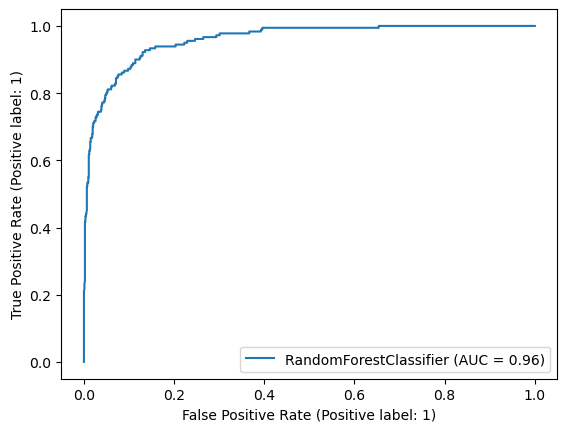

In [132]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);

#### HyperParameters

In [43]:
random_forest = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                      criterion='gini',     # Split quality criterion (gini or entropy)
                                      max_depth=None,      # Maximum depth of the trees
                                      min_samples_split=2, # Minimum samples required to split an internal node
                                      min_samples_leaf=1,  # Minimum samples required to be in a leaf node
                                                    # Number of features to consider for the best split
                                      bootstrap=True,       # Whether to use bootstrap samples
                                      class_weight=None,    # Class weights (None for equal weights)
                                      random_state=42,      # Random seed for reproducibility
                                      n_jobs=-1)
random_forest.fit(X_train_, y_train)
y_pred = random_forest.predict(X_test_)

#### Cross Validation

In [44]:
cv_results = cross_validate(
                    estimator=forest,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [45]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [46]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(forest, X_train_, y_train, cv=num_folds, scoring=metric)

    # Print the cross-validation scores for the current metric
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.50561798 0.49152542 0.37288136 0.50847458 0.51412429]
Mean Accuracy CV Score: 0.47852472544912084

F1 Cross-Validation Scores: [0.66920152 0.60526316 0.34682081 0.6        0.32258065]
Mean F1 CV Score: 0.508773226643426

Precision Cross-Validation Scores: [0.50980392 0.5234375  0.39285714 0.51145038 0.46666667]
Mean Precision CV Score: 0.4808431225543653

Recall Cross-Validation Scores: [0.92307692 0.78021978 0.32967033 0.7032967  0.3       ]
Mean Recall CV Score: 0.6072527472527474

Roc_auc Cross-Validation Scores: [0.49526336 0.45323281 0.30040889 0.38627651 0.53173691]
Mean Roc_auc CV Score: 0.4333836975938018



#### Additional Models

In [47]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, classification_report

In [48]:
models = []
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train) 
models.append(model1)

In [49]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_, y_train) 
models.append(model2)

In [50]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 
models.append(model3)

In [51]:
for i, model in enumerate(models):
    y_pred = model.predict(X_test_)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model {i + 1} - Accuracy: {accuracy}\nClassification Report:\n{report}\n")

Model 1 - Accuracy: 0.5033783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.45      0.49       159
           1       0.47      0.57      0.51       137

    accuracy                           0.50       296
   macro avg       0.51      0.51      0.50       296
weighted avg       0.51      0.50      0.50       296


Model 2 - Accuracy: 0.4831081081081081
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       159
           1       0.45      0.53      0.48       137

    accuracy                           0.48       296
   macro avg       0.49      0.49      0.48       296
weighted avg       0.49      0.48      0.48       296


Model 3 - Accuracy: 0.543918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.52       159
           1       0.51      0.65      0.57       

#### Hyperparameters

In [52]:
logreg_model_more_iterations = LogisticRegression(random_state=2022, penalty = None, max_iter=5000)
logreg_model_more_iterations.fit(X_train_, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=2022)

In [53]:
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2022, 
                                                penalty=None, 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train_, y_train)

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=2022, tol=25)

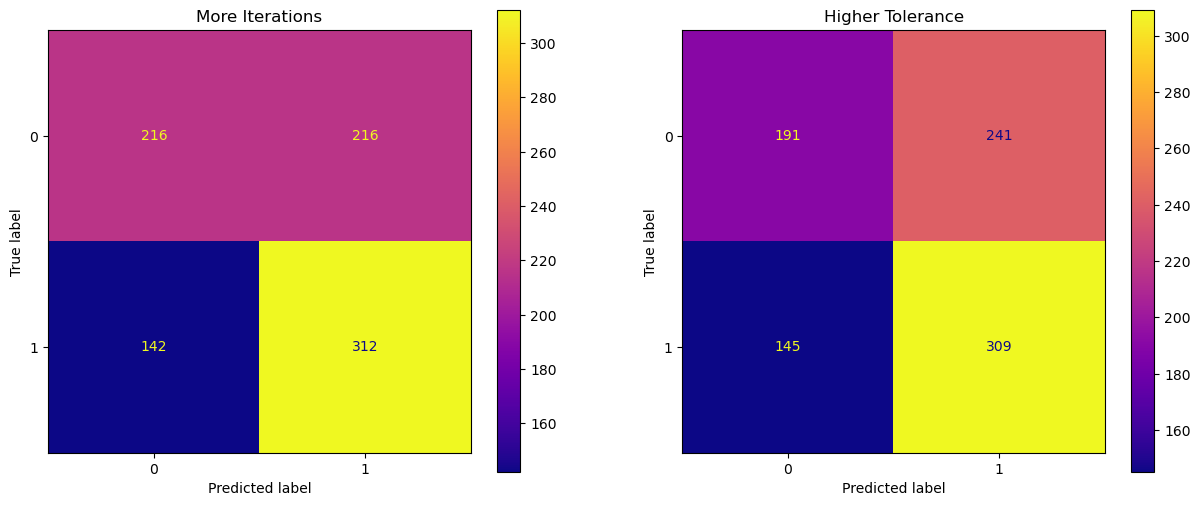

In [54]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

#plot_confusion_matrix(logreg_model_more_iterations, X_train_imputed, y_train, ax=axes[0], cmap="plasma")
#plot_confusion_matrix(logreg_model_higher_tolerance, X_train_imputed, y_train, ax=axes[1], cmap="plasma");

ConfusionMatrixDisplay.from_estimator(logreg_model_more_iterations, X_train_, y_train, ax=axes[0], cmap="plasma")
ConfusionMatrixDisplay.from_estimator(logreg_model_higher_tolerance, X_train_, y_train, ax=axes[1], cmap="plasma");

#### Analysis

- There were more instances where the model was displaying true positives than true negatives for the confusion matrix with more iterations
- The Higher Tolerance model had the same trend. The number of True positives decreased, the true negatives decreased more. The false positives increased and the false negatives increased even more. 

#### SMOTE Function

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [56]:
over = SMOTE(sampling_strategy=1.0) 
under = RandomUnderSampler(sampling_strategy=1.0)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [57]:
X_resampled, y_resampled = pipeline.fit_resample(X_train_, y_train)

In [58]:
# Split the resampled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train your model (e.g., using scikit-learn's classifiers)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46703296703296704
Confusion Matrix:
 [[46 52]
 [45 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49        98
           1       0.43      0.46      0.45        84

    accuracy                           0.47       182
   macro avg       0.47      0.47      0.47       182
weighted avg       0.47      0.47      0.47       182



## Attrition - Unbalanced Study

In [70]:
df = pd.read_csv('HR_Analytics.csv')
df['Attrition'].value_counts()

No     1242
Yes     238
Name: Attrition, dtype: int64

#### Drop NAs

In [71]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

#### One Hot Encode Target Variables

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Attrition'])
encoded_data
df['Attrition'] = pd.DataFrame(encoded_data, columns = ['Attrition'], index=df['Attrition'].index)
df['Attrition'].value_counts()

0    1242
1     238
Name: Attrition, dtype: int64

#### Train Test Set

In [73]:
y = df['Attrition']
X = df.drop(columns=['Attrition'], axis=1)
X.head()
y.value_counts(normalize=True)

0    0.839189
1    0.160811
Name: Attrition, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
y_train

1183    0
609     0
581     0
1047    0
938     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 1110, dtype: int64

#### One Hot Encode Data

In [75]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
0,18,230,3,3,1,405,3,54,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,18,287,5,2,1,1012,2,73,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,18,544,3,2,1,1624,2,70,3,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
7,18,1431,14,3,1,1839,2,33,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,19,602,1,1,1,235,3,100,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Test Object Variables

In [76]:
test_dummies = ohe.transform(X_test[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
567,33,392,2,4,1,1670,4,93,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1041,41,1200,22,3,1,1392,4,75,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
649,34,735,3,1,1,1915,4,75,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
666,35,662,1,5,1,204,3,94,3,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
568,33,530,16,3,1,1681,3,36,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,32,1125,16,1,1,33,2,72,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1328,50,1421,2,3,1,1215,4,30,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
575,33,1303,7,2,1,1970,4,36,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1421,55,444,2,1,1,1074,3,40,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### First Simple Model

In [77]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

#### Metrics

In [79]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.0



Training Recall:  0.005555555555555556
Testing Recall:  0.0



Training Accuracy:  0.8387387387387387
Testing Accuracy:  0.8432432432432433



Training F1-Score:  0.011049723756906079
Testing F1-Score:  0.0


/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC Curve

In [80]:
from sklearn.metrics import roc_curve,RocCurveDisplay

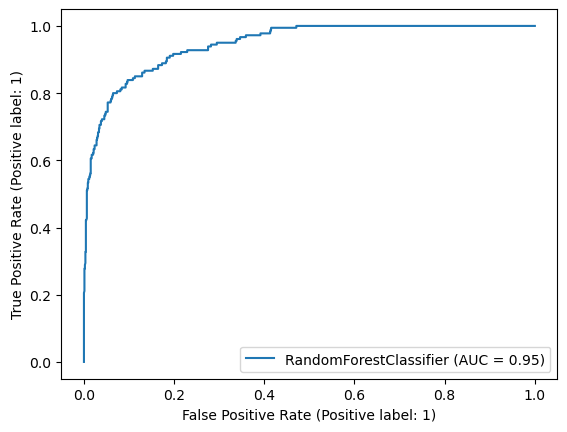

In [81]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);

#### Additional Models

In [106]:
models = []
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train) 
models.append(model1)

In [107]:
model2 = RandomForestClassifier() 
model2.fit(X_train_, y_train) 
models.append(model2)

In [108]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 
models.append(model3)

In [109]:
for i, model in enumerate(models):
    y_pred = model.predict(X_test_)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model {i + 1} - Accuracy: {accuracy}\nClassification Report:\n{report}\n")

Model 1 - Accuracy: 0.8432432432432433
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       312
           1       0.00      0.00      0.00        58

    accuracy                           0.84       370
   macro avg       0.42      0.50      0.46       370
weighted avg       0.71      0.84      0.77       370


Model 2 - Accuracy: 0.8378378378378378
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       312
           1       0.00      0.00      0.00        58

    accuracy                           0.84       370
   macro avg       0.42      0.50      0.46       370
weighted avg       0.71      0.84      0.77       370


Model 3 - Accuracy: 0.4891891891891892
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       312
           1       0.12      0.34      0.17      

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

#### Analysis

- Model 1, the Logistic Regression, has a high accuracy score at 0.83. However, since the data is unbalanced for Attrition, the scores are high for attrition and very low for not having attrition
- Model 2, the Random Forest Classifier, has a high acccuracy score of 0.83. However, the outcome is the same as the Logisitic Regression for the scores
- Model 3, the Mulitnomial, has the lowest score with an accuracy score of 0.489. The scores are more evenly distributed for this model, however, still skewed toward the no attrition column.

#### Hyperparameters

In [75]:
logreg_model_more_iterations = LogisticRegression(random_state=2022, penalty = None, max_iter=5000)
logreg_model_more_iterations.fit(X_train_, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=2022)

In [110]:
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2022, 
                                                penalty=None, 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train_, y_train)

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=2022, tol=25)

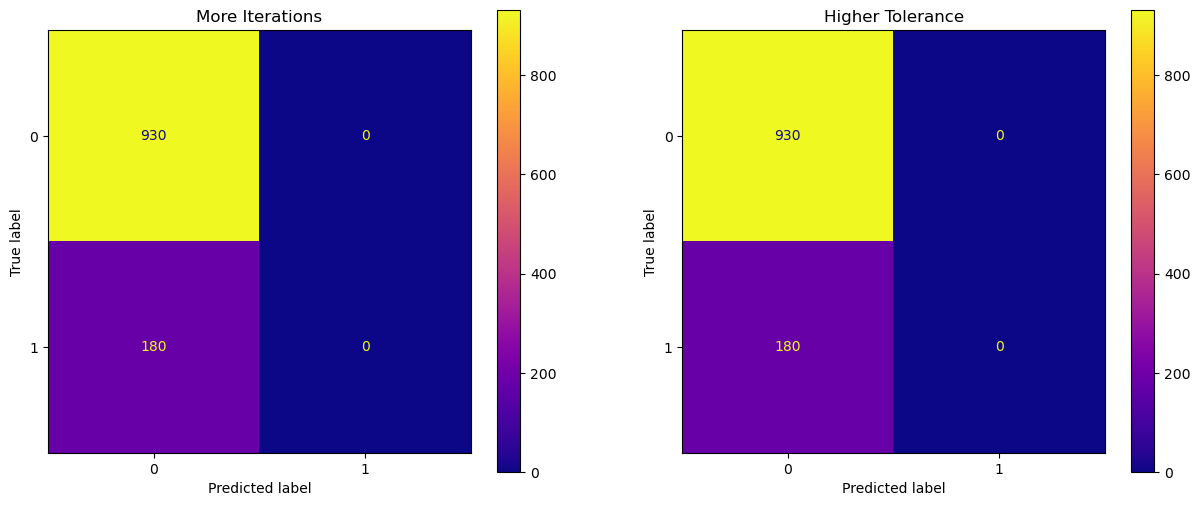

In [111]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

#plot_confusion_matrix(logreg_model_more_iterations, X_train_imputed, y_train, ax=axes[0], cmap="plasma")
#plot_confusion_matrix(logreg_model_higher_tolerance, X_train_imputed, y_train, ax=axes[1], cmap="plasma");

ConfusionMatrixDisplay.from_estimator(logreg_model_more_iterations, X_train_, y_train, ax=axes[0], cmap="plasma")
ConfusionMatrixDisplay.from_estimator(logreg_model_higher_tolerance, X_train_, y_train, ax=axes[1], cmap="plasma");

#### Cross Validation for Logistic Regression

In [78]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [79]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [80]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_train_, y_train, cv=num_folds, scoring=metric)

    # Print the cross-validation scores for the current metric
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.83783784 0.83783784 0.83783784 0.83783784 0.83783784]
Mean Accuracy CV Score: 0.8378378378378379

F1 Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean F1 CV Score: 0.0



/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/pyt

Precision Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Precision CV Score: 0.0

Recall Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Recall CV Score: 0.0

Roc_auc Cross-Validation Scores: [0.46206691 0.49395161 0.50253883 0.52889785 0.56966846]
Mean Roc_auc CV Score: 0.5114247311827957



#### Linear Regression

In [113]:
#MonthlyIncome as Target Variable
y = df['MonthlyIncome']
X = df[['YearsAtCompany','YearsSinceLastPromotion','TrainingTimesLastYear','TotalWorkingYears',
       'PerformanceRating','MonthlyRate','YearsInCurrentRole','HourlyRate']]

In [82]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [114]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     274.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.95e-285
Time:                        14:00:53   Log-Likelihood:                -13937.
No. Observations:                1480   AIC:                         2.789e+04
Df Residuals:                    1471   BIC:                         2.794e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [130]:
y = df['MonthlyIncome']
X = df[['YearsAtCompany','TotalWorkingYears']]

In [131]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1095.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.36e-292
Time:                        14:22:22   Log-Likelihood:                -13941.
No. Observations:                1480   AIC:                         2.789e+04
Df Residuals:                    1477   BIC:                         2.790e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1183.5236    138.80

- For a Linear Regression where MonthlyIncome is the target variable, YearsAtCompany and TotalWorkingYeaars are
  significant at the 1% level. The R**2 value is consistent at the 0.59 level.

In [118]:
#Years in Current Role as Target Variable
y = df['YearsInCurrentRole']
X = df[['YearsAtCompany','YearsSinceLastPromotion','MonthlyIncome','TrainingTimesLastYear','TotalWorkingYears',
       'PerformanceRating','MonthlyRate','HourlyRate']]

In [119]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:     YearsInCurrentRole   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     262.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          5.79e-277
Time:                        14:03:26   Log-Likelihood:                -3345.4
No. Observations:                1480   AIC:                             6709.
Df Residuals:                    1471   BIC:                             6757.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [128]:
y = df['YearsInCurrentRole']
X = df[['YearsSinceLastPromotion','YearsAtCompany']]

In [129]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:     YearsInCurrentRole   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1045.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.41e-283
Time:                        14:09:31   Log-Likelihood:                -3349.3
No. Observations:                1480   AIC:                             6705.
Df Residuals:                    1477   BIC:                             6720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- For a Linear Regression where YearsInCurrentRole is the target variable, YearsSinceLastPromotion and YearsAtCompany are
  significant at the 1% level. The R**2 value is consistent at the 0.58 level.

#### Multiclass for other Variables

In [84]:
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
1,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
2,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,0,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11
1476,60,55+,0,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,3,4,80,0,22,5,4,18,13,13
1477,60,55+,0,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,80,0,10,1,3,2,2,2
1478,60,55+,0,Travel_Rarely,696,Sales,7,4,Marketing,1,...,3,2,80,1,12,3,3,11,7,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1480 non-null   int64 
 1   AgeGroup                  1480 non-null   object
 2   Attrition                 1480 non-null   int64 
 3   BusinessTravel            1480 non-null   object
 4   DailyRate                 1480 non-null   int64 
 5   Department                1480 non-null   object
 6   DistanceFromHome          1480 non-null   int64 
 7   Education                 1480 non-null   int64 
 8   EducationField            1480 non-null   object
 9   EmployeeCount             1480 non-null   int64 
 10  EmployeeNumber            1480 non-null   int64 
 11  EnvironmentSatisfaction   1480 non-null   int64 
 12  Gender                    1480 non-null   object
 13  HourlyRate                1480 non-null   int64 
 14  JobInvolvement          

In [86]:
df['MaritalStatus'].value_counts()

Married     679
Single      473
Divorced    328
Name: MaritalStatus, dtype: int64

In [112]:
y = df['MaritalStatus']
X = df[['Age','DistanceFromHome','Education','EmployeeCount','PerformanceRating','RelationshipSatisfaction','StandardHours',
        'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
        'YearsSinceLastPromotion','NumCompaniesWorked','EnvironmentSatisfaction','PerformanceRating','PercentSalaryHike','NumCompaniesWorked',
       'MonthlyIncome','JobSatisfaction','JobLevel','JobInvolvement','HourlyRate','EnvironmentSatisfaction','Education',
       'DistanceFromHome','DailyRate']]
X.head()
y.value_counts(normalize=True)

Married     0.458784
Single      0.319595
Divorced    0.221622
Name: MaritalStatus, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
X_train

,Age,DistanceFromHome,Education,EmployeeCount,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,NumCompaniesWorked,MonthlyIncome,JobSatisfaction,JobLevel,JobInvolvement,HourlyRate,EnvironmentSatisfaction,Education,DistanceFromHome,DailyRate
1183,45,1,4,1,3,4,80,2,8,2,...,3,2270,4,1,3,91,4,4,1,974
609,34,3,2,1,3,3,80,1,4,1,...,0,3737,4,1,3,88,3,2,3,829
581,34,23,4,1,4,3,80,0,10,2,...,0,4568,3,2,3,72,2,4,23,1065
1047,41,5,3,1,3,1,80,0,11,3,...,3,6870,2,2,4,85,2,3,5,447
938,39,6,3,1,3,1,80,1,11,3,...,2,8237,3,3,4,38,4,3,6,1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,36,14,1,1,3,1,80,1,17,2,...,0,6586,4,2,3,68,3,1,14,1425
835,37,19,2,1,3,4,80,0,10,2,...,1,7642,2,3,3,32,1,2,19,1252
1216,46,10,3,1,3,3,80,1,15,3,...,2,9071,4,3,2,94,3,3,10,1125
559,33,10,5,1,3,4,80,2,10,3,...,0,8380,3,3,4,82,4,5,10,536


In [89]:
from sklearn.preprocessing import StandardScaler
hr_scaler = StandardScaler()
X_train_ = hr_scaler.fit_transform(X_train)
X_test_ = hr_scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
hr_model = LogisticRegression(max_iter = 10000)
hr_model.fit(X_train_, y_train)
y_pred_hr = hr_model.predict(X_test_)

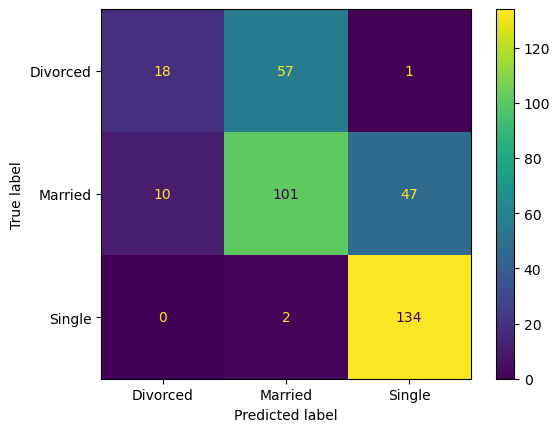

In [91]:
ConfusionMatrixDisplay.from_estimator(hr_model, X_test_, 
                      y_test);

In [92]:
print(classification_report(y_pred_hr, y_test))

              precision    recall  f1-score   support

    Divorced       0.24      0.64      0.35        28
     Married       0.64      0.63      0.64       160
      Single       0.99      0.74      0.84       182

    accuracy                           0.68       370
   macro avg       0.62      0.67      0.61       370
weighted avg       0.78      0.68      0.72       370

